In [1]:
import pythreejs as pjs
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
import os
import copy
from PIL import Image
from IPython.display import display

In [2]:
import json

scene_number = 71

scene_file= os.path.join(f'{scene_number:06d}', 'scene_20fe05b2418deafbaaabfdc005b9828fa2e0a455.json')
with open(scene_file, 'r') as f:
    scene = json.load(f)

In [3]:
calib_file = os.path.join(f'{scene_number:06d}', 'calibration', '3d9f21a7abaca3ea61d07266dce09cfb995b79ec.json')
with open(calib_file, 'r') as f:
    calib = json.load(f)

In [5]:
lidar_datum=[]
cam1_datum=[]
cam5_datum=[]
cam6_datum=[]
cam7_datum=[]
cam8_datum=[]
cam9_datum=[]
for i in range(20):
    index_lidar = i * (6+1)
    index_1 = i * (6+1) + 1
    index_5 = i * (6+1) + 2
    index_6 = i * (6+1) + 3
    index_7 = i * (6+1) + 4
    index_8 = i * (6+1) + 5
    index_9 = i * (6+1) + 6
    lidar_datum.append(scene['data'][index_lidar]['datum'])
    cam1_datum.append(scene['data'][index_1]['datum'])
    cam5_datum.append(scene['data'][index_5]['datum'])
    cam6_datum.append(scene['data'][index_6]['datum'])
    cam7_datum.append(scene['data'][index_7]['datum'])
    cam8_datum.append(scene['data'][index_8]['datum'])
    cam9_datum.append(scene['data'][index_9]['datum'])

In [6]:
img_directory_1 = "000071/rgb/CAMERA_01/"
img_files_1 = [f for f in os.listdir(img_directory_1) if f.endswith('.png')]
img_directory_5 = "000071/rgb/CAMERA_05/"
img_files_5 = [f for f in os.listdir(img_directory_5) if f.endswith('.png')]
img_directory_6 = "000071/rgb/CAMERA_06/"
img_files_6 = [f for f in os.listdir(img_directory_6) if f.endswith('.png')]
img_directory_7 = "000071/rgb/CAMERA_07/"
img_files_7 = [f for f in os.listdir(img_directory_7) if f.endswith('.png')]
img_directory_8 = "000071/rgb/CAMERA_08/"
img_files_8 = [f for f in os.listdir(img_directory_8) if f.endswith('.png')]
img_directory_9 = "000071/rgb/CAMERA_09/"
img_files_9 = [f for f in os.listdir(img_directory_9) if f.endswith('.png')]

img_path_1=[]
img_path_5=[]
img_path_6=[]
img_path_7=[]
img_path_8=[]
img_path_9=[]

for img_file_name in img_files_1:
    img_file_path = os.path.join(img_directory_1, img_file_name)
    img_path_1.append(img_file_path)
for img_file_name in img_files_5:
    img_file_path = os.path.join(img_directory_5, img_file_name)
    img_path_5.append(img_file_path)
for img_file_name in img_files_6:
    img_file_path = os.path.join(img_directory_6, img_file_name)
    img_path_6.append(img_file_path)
for img_file_name in img_files_7:
    img_file_path = os.path.join(img_directory_7, img_file_name)
    img_path_7.append(img_file_path)
for img_file_name in img_files_8:
    img_file_path = os.path.join(img_directory_8, img_file_name)
    img_path_8.append(img_file_path)
for img_file_name in img_files_9:
    img_file_path = os.path.join(img_directory_9, img_file_name)
    img_path_9.append(img_file_path)

In [7]:
img_list_1=[]
img_list_5=[]
img_list_6=[]
img_list_7=[]
img_list_8=[]
img_list_9=[]

depth_camera_list_1=[]
depth_camera_list_5=[]
depth_camera_list_6=[]
depth_camera_list_7=[]
depth_camera_list_8=[]
depth_camera_list_9=[]

intrinsic_list_1=[]
intrinsic_list_5=[]
intrinsic_list_6=[]
intrinsic_list_7=[]
intrinsic_list_8=[]
intrinsic_list_9=[]

extrinsic_list_1=[]
extrinsic_list_5=[]
extrinsic_list_6=[]
extrinsic_list_7=[]
extrinsic_list_8=[]
extrinsic_list_9=[]

pose_list_1=[]
pose_list_5=[]
pose_list_6=[]
pose_list_7=[]
pose_list_8=[]
pose_list_9=[]

for i in range(len(img_path_1)):
    stream=open(img_path_1[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera01 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera01 = image_camera01[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_1.append(image_camera01)

    depth_camera01 = np.load(img_path_1[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera01 = calib['intrinsics'][1]
    extrinsics_camera01 = calib['extrinsics'][1]     # Sometimes, has error
    pose_camera01 = cam1_datum[i]['image']['pose']

    depth_camera_list_1.append(depth_camera01)
    intrinsic_list_1.append(intrinsics_camera01)
    extrinsic_list_1.append(extrinsics_camera01)
    pose_list_1.append(pose_camera01)

for i in range(len(img_path_5)):
    stream=open(img_path_5[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera05 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera05 = image_camera05[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_5.append(image_camera05)

    depth_camera05 = np.load(img_path_5[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera05 = calib['intrinsics'][2]
    extrinsics_camera05 = calib['extrinsics'][2]    # Sometimes, has error
    pose_camera05 = cam5_datum[i]['image']['pose']

    depth_camera_list_5.append(depth_camera05)
    intrinsic_list_5.append(intrinsics_camera05)
    extrinsic_list_5.append(extrinsics_camera05)
    pose_list_5.append(pose_camera05)

for i in range(len(img_path_6)):
    stream=open(img_path_6[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera06 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera06 = image_camera06[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_6.append(image_camera06)

    depth_camera06 = np.load(img_path_6[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera06 = calib['intrinsics'][3]
    extrinsics_camera06 = calib['extrinsics'][3]     # Sometimes, has error
    pose_camera06 = cam6_datum[i]['image']['pose']

    depth_camera_list_6.append(depth_camera06)
    intrinsic_list_6.append(intrinsics_camera06)
    extrinsic_list_6.append(extrinsics_camera06)
    pose_list_6.append(pose_camera06)

for i in range(len(img_path_7)):
    stream=open(img_path_7[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera07 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera07 = image_camera07[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_7.append(image_camera07)

    depth_camera07 = np.load(img_path_7[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera07 = calib['intrinsics'][4]
    extrinsics_camera07 = calib['extrinsics'][4]     # Sometimes, has error
    pose_camera07 = cam7_datum[i]['image']['pose']

    depth_camera_list_7.append(depth_camera07)
    intrinsic_list_7.append(intrinsics_camera07)
    extrinsic_list_7.append(extrinsics_camera07)
    pose_list_7.append(pose_camera07)

for i in range(len(img_path_8)):
    stream=open(img_path_8[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera08 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera08 = image_camera08[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_8.append(image_camera08)

    depth_camera08 = np.load(img_path_8[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera08 = calib['intrinsics'][5]
    extrinsics_camera08 = calib['extrinsics'][5]     # Sometimes, has error
    pose_camera08 = cam8_datum[i]['image']['pose']

    depth_camera_list_8.append(depth_camera08)
    intrinsic_list_8.append(intrinsics_camera08)
    extrinsic_list_8.append(extrinsics_camera08)
    pose_list_8.append(pose_camera08)

for i in range(len(img_path_9)):
    stream=open(img_path_9[i],"rb")
    bytes=bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image_camera09 = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    image_camera09 = image_camera09[:, :, (2, 1, 0)]  # BGR -> RGB
    img_list_9.append(image_camera09)

    depth_camera09 = np.load(img_path_9[i].replace('rgb', 'depth/lidar').replace('.png', '.npz'))['depth']
    intrinsics_camera09 = calib['intrinsics'][6]
    extrinsics_camera09 = calib['extrinsics'][6]     # Sometimes, has error
    pose_camera09 = cam9_datum[i]['image']['pose']

    depth_camera_list_9.append(depth_camera09)
    intrinsic_list_9.append(intrinsics_camera09)
    extrinsic_list_9.append(extrinsics_camera09)
    pose_list_9.append(pose_camera09)

20
20
20
20
20
20


In [9]:
# Code from https://github.com/facebookresearch/pytorch3d/blob/e245560abb8f019a24880faf7557ed3b2eec6cc0/pytorch3d/transforms/rotation_conversions.py#L41-L70

def quaternion_to_matrix(quaternions: np.ndarray) -> np.ndarray:
    """Convert rotations given as quaternions to rotation matrices.

    Parameters
    ----------
    quaternions: np.ndarray (4)
        quaternions with real part first

    Returns
    -------
    rotation_matrix: np.ndarray (3 x 3)
        converted rotation matrix
    """

    r, i, j, k = quaternions
    # pyre-fixme[58]: `/` is not supported for operand types `float` and `Tensor`.
    two_s = 2.0 / (quaternions ** 2).sum()

    o = np.array([
            1 - two_s * (j * j + k * k),
            two_s * (i * j - k * r),
            two_s * (i * k + j * r),
            two_s * (i * j + k * r),
            1 - two_s * (i * i + k * k),
            two_s * (j * k - i * r),
            two_s * (i * k - j * r),
            two_s * (j * k + i * r),
            1 - two_s * (i * i + j * j),
    ])
    rotation_matrix = o.reshape(3, 3)
    return rotation_matrix

In [10]:
def get_intrinsic_matrix(intrinsics):
    K = np.eye(3)
    K[0, 0] = intrinsics['fx']
    K[1, 1] = intrinsics['fy']
    K[0, 2] = intrinsics['cx']
    K[1, 2] = intrinsics['cy']
    return K

def get_pose_matrix(pose):
    quaternion = np.array([
        pose['rotation']['qw'],
        pose['rotation']['qx'],
        pose['rotation']['qy'],
        pose['rotation']['qz'],
    ])

    T_world_from_camera = np.eye(4)
    T_world_from_camera[:3, :3] = quaternion_to_matrix(quaternion)
    T_world_from_camera[ 0,  3] = pose['translation']['x']
    T_world_from_camera[ 1,  3] = pose['translation']['y']
    T_world_from_camera[ 2,  3] = pose['translation']['z']

    return T_world_from_camera

In [11]:
def get_pixel_grid(height, width, with_ones=True):
    """Create a pixel grid

    Parameters
    ----------
    height : int
        height of the grid
    width : int
        width of the grid
    with_ones : Bool
        whether the ones are appended (homogeneous coordinate)

    Returns
    -------
    grid : np.ndarray (2 x H x W) or (3 x H x W)
        Output pixel grid
    """
    xx, yy = np.meshgrid(
        np.linspace(0, width - 1, width),
        np.linspace(0, height - 1, height),
        indexing='xy')

    coords = [xx, yy]
    if with_ones:
        coords += [np.ones_like(xx)]
    grid = np.stack(coords, 0)
    return grid

In [12]:
def reconstruct_depth_map(depth, K, T_wc):
    """Reconstruct 3D points in world coordinate from depth map

    Parameters
    ----------
    depth : np.ndarray (H x W)
        input depth map
    K : np.ndarray (3 x 3)
        intrinsic matrix of the camera
    T_wc : np.ndarray (4 x 4)
        transformation to world coordinate from camera coordinate

    Returns
    -------
    points : np.ndarray (3 x H x W)
        output 3D points
    """
    h, w = depth.shape
    K_inv = np.linalg.inv(K)  # (3 x 3)

    # Get a pixel grid (image coordinate)
    grid = get_pixel_grid(h, w, with_ones=True)
    grid = grid.reshape(3, -1)    # (3 x H x W) -> (3 x N)

    # Get 3D points in camera coordinate system
    #  - numpy broadcasting during element-wise multiplication
    #    : (1 x N) * (3 x N) -> (3 x N) (broadcasting) * (3 x N) -> (3 x N)
    pts3d_cam = depth.reshape(1, -1) * np.matmul(K_inv, grid)

    # Transform the coordinate, from camera to world
    pts3d_cam_homogeneous = np.concatenate([pts3d_cam, np.ones((1, h * w))], axis=0)
    pts3d_world = np.matmul(T_wc, pts3d_cam_homogeneous)
    pts3d_world = pts3d_world[:3]

    return pts3d_world.reshape(3, h, w)

In [13]:
# (Optional) resize rgb and depth for visualization
# be careful, if you resize rgb/depth, then intrinsic metrix(K) should be adjusted too.

def resize_npy_preserve(depth, shape, expand_dims=True):
    """
    Resizes depth map preserving all valid depth pixels
    Multiple downsampled points can be assigned to the same pixel.

    Parameters
    ----------
    depth : np.Array
        Depth map [h,w]
    shape : Tuple
        Output shape (H,W)

    Returns
    -------
    depth : np.Array
        Resized depth map [H,W,1]
    """

    # Store dimensions and reshapes to single column
    depth = np.squeeze(depth)
    h, w = depth.shape
    x = depth.reshape(-1)
    # Create coordinate grid
    uv = np.mgrid[:h, :w].transpose(1, 2, 0).reshape(-1, 2)
    # Filters valid points
    idx = x > 0
    crd, val = uv[idx], x[idx]
    # Downsamples coordinates
    crd[:, 0] = (crd[:, 0] * (shape[0] / h)).astype(np.int32)
    crd[:, 1] = (crd[:, 1] * (shape[1] / w)).astype(np.int32)
    # Filters points inside image
    idx = (crd[:, 0] < shape[0]) & (crd[:, 1] < shape[1])
    crd, val = crd[idx], val[idx]
    # Creates downsampled depth image and assigns points
    depth = np.zeros(shape)
    depth[crd[:, 0], crd[:, 1]] = val
    # Return resized depth map
    return np.expand_dims(depth, axis=2) if expand_dims else depth

In [14]:
intrinsic_camera01=intrinsic_list_1[0]
K_camera01 = get_intrinsic_matrix(intrinsics_camera01)

intrinsic_camera05=intrinsic_list_5[0]
K_camera05 = get_intrinsic_matrix(intrinsics_camera05)

intrinsic_camera06=intrinsic_list_6[0]
K_camera06 = get_intrinsic_matrix(intrinsics_camera06)

intrinsic_camera07=intrinsic_list_7[0]
K_camera07 = get_intrinsic_matrix(intrinsics_camera07)

intrinsic_camera01=intrinsic_list_8[0]
K_camera08 = get_intrinsic_matrix(intrinsics_camera08)

intrinsic_camera09=intrinsic_list_9[0]
K_camera09 = get_intrinsic_matrix(intrinsics_camera09)

print(K_camera01)
print(K_camera05)
print(K_camera06)
print(K_camera07)
print(K_camera08)
print(K_camera09)

[[2.18758924e+03 0.00000000e+00 9.48198170e+02]
 [0.00000000e+00 2.18288103e+03 5.88969236e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.07349128e+03 0.00000000e+00 9.51520672e+02]
 [0.00000000e+00 1.07193697e+03 6.13493330e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.06465304e+03 0.00000000e+00 9.36042730e+02]
 [0.00000000e+00 1.06321261e+03 6.00170761e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.06249400e+03 0.00000000e+00 9.54641504e+02]
 [0.00000000e+00 1.06233075e+03 6.02988692e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.06663807e+03 0.00000000e+00 9.63260344e+02]
 [0.00000000e+00 1.06407573e+03 6.07153662e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.05876835e+03 0.00000000e+00 9.57785991e+02]
 [0.00000000e+00 1.05619478e+03 6.13814894e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [15]:
T_w_lidar=[]
T_w_cam1=[]
T_w_cam5=[]
T_w_cam6=[]
T_w_cam7=[]
T_w_cam8=[]
T_w_cam9=[]
for i in range(len(lidar_datum)):
    t_w_from_lidar=get_pose_matrix(lidar_datum[i]['point_cloud']['pose'])
    T_w_lidar.append(t_w_from_lidar)

    t_w_from_cam1=get_pose_matrix(cam1_datum[i]['image']['pose'])
    T_w_cam1.append(t_w_from_cam1)

    t_w_from_cam5=get_pose_matrix(cam5_datum[i]['image']['pose'])
    T_w_cam5.append(t_w_from_cam5)

    t_w_from_cam6=get_pose_matrix(cam6_datum[i]['image']['pose'])
    T_w_cam6.append(t_w_from_cam6)

    t_w_from_cam7=get_pose_matrix(cam7_datum[i]['image']['pose'])
    T_w_cam7.append(t_w_from_cam7)

    t_w_from_cam8=get_pose_matrix(cam8_datum[i]['image']['pose'])
    T_w_cam8.append(t_w_from_cam8)

    t_w_from_cam9=get_pose_matrix(cam9_datum[i]['image']['pose'])
    T_w_cam9.append(t_w_from_cam9)

In [16]:
tr_list=[np.dot(np.linalg.inv(T_w_lidar[i]),T_w_lidar[i+1]) for i in range(len(T_w_lidar)-1)]
print(tr_list[1])

[[ 9.99998833e-01  1.50410685e-03 -2.69176829e-04  5.83908433e-01]
 [-1.50351193e-03  9.99996457e-01  2.19685331e-03 -4.77108283e-04]
 [ 2.72480178e-04 -2.19644604e-03  9.99997551e-01  5.02960294e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [17]:
# Without this resizing, LiDAR depth map is hard to see due to its sparsity.
src_shape = np.array(depth_camera_list_1[0]).shape
dst_shape = (384, 640)
print(np.array(depth_camera_list_1).shape)
print(src_shape)

(20, 1216, 1936)
(1216, 1936)


In [18]:
#LiDAR depth map을 이미지에 맞게 resizing
depth_camera_list_1 = [resize_npy_preserve(depth_camera_list_1[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_1).shape[0])]
img_list_1 = [cv2.resize(img_list_1[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_1))]

depth_camera_list_5 = [resize_npy_preserve(depth_camera_list_5[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_5).shape[0])]
img_list_5 = [cv2.resize(img_list_5[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_5))]

depth_camera_list_6 = [resize_npy_preserve(depth_camera_list_6[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_6).shape[0])]
img_list_6 = [cv2.resize(img_list_6[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_6))]

depth_camera_list_7 = [resize_npy_preserve(depth_camera_list_7[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_7).shape[0])]
img_list_7 = [cv2.resize(img_list_7[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_7))]

depth_camera_list_8 = [resize_npy_preserve(depth_camera_list_8[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_8).shape[0])]
img_list_8 = [cv2.resize(img_list_8[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_8))]

depth_camera_list_9 = [resize_npy_preserve(depth_camera_list_9[i], dst_shape, expand_dims=False) for i in range(np.array(depth_camera_list_9).shape[0])]
img_list_9 = [cv2.resize(img_list_9[i], (dst_shape[1], dst_shape[0])) for i in range(len(img_list_9))]

ratio_w = dst_shape[1] / src_shape[1] #1.0
ratio_h = dst_shape[0] / src_shape[0] #1.0

#rgb/depth map을 resizing했으므로, intrinsic matrix도 resizing해준다
#여기선 ratio_w, ratio_h가 값이 1이므로 결과적으론 둘이 동일

K_camera01[0][0] *= ratio_w
K_camera01[1][1] *= ratio_h
K_camera01[0][2] *= ratio_w
K_camera01[1][2] *= ratio_h


K_camera05[0][0] *= ratio_w
K_camera05[1][1] *= ratio_h
K_camera05[0][2] *= ratio_w
K_camera05[1][2] *= ratio_h

K_camera06[0][0] *= ratio_w
K_camera06[1][1] *= ratio_h
K_camera06[0][2] *= ratio_w
K_camera06[1][2] *= ratio_h

K_camera07[0][0] *= ratio_w
K_camera07[1][1] *= ratio_h
K_camera07[0][2] *= ratio_w
K_camera07[1][2] *= ratio_h

K_camera08[0][0] *= ratio_w
K_camera08[1][1] *= ratio_h
K_camera08[0][2] *= ratio_w
K_camera08[1][2] *= ratio_h

K_camera09[0][0] *= ratio_w
K_camera09[1][1] *= ratio_h
K_camera09[0][2] *= ratio_w
K_camera09[1][2] *= ratio_h

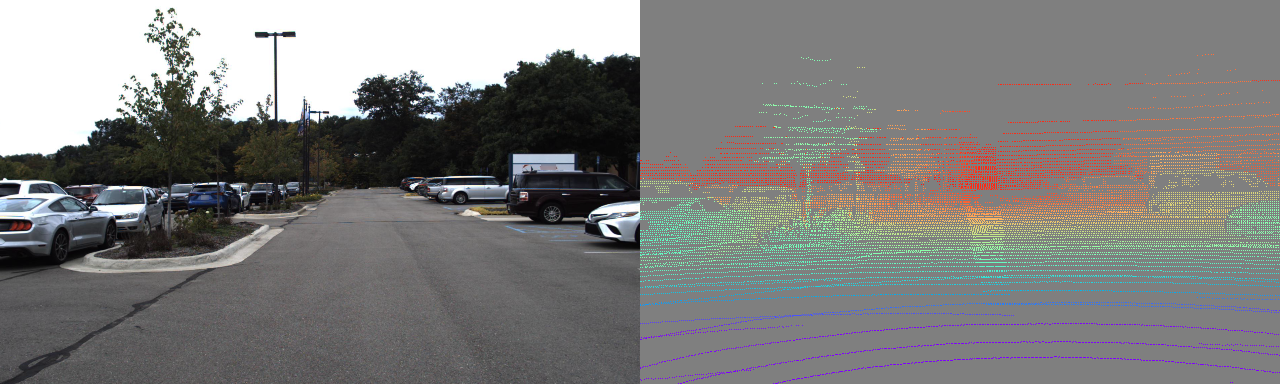

In [19]:
def viz_depth(depth, background=(0.5, 0.5, 0.5)):
    # "depth == 0" means that there is no LiDAR point observed
    invalid = depth == 0

    inv_depth = 1. / depth.clip(1e-6, None)
    inv_depth[invalid] = 0.

    percentile = 95
    normalizer = np.percentile(inv_depth[inv_depth > 0], percentile)
    inv_depth = inv_depth / (normalizer + 1e-6)

    cmap = plt.colormaps['rainbow_r']
    depth_colored = cmap(np.clip(inv_depth, 0., 1.0))[:, :, :3]
    depth_colored[invalid] = background

    return (depth_colored * 255.0).astype(np.uint8)

Image.fromarray(
    np.concatenate([img_list_1[0], viz_depth(depth_camera_list_1[0])],axis=1)
)

In [ ]:
pcd_directory = "000071/point_cloud/LIDAR"
pcd_file_list = [f for f in os.listdir(pcd_directory) if f.endswith('.npz')]
pcd_lidar = [np.load(os.path.join(pcd_directory, pcd_file_list[i]))['data'] for i in range(len(pcd_file_list))]

In [ ]:
def visualize_3d(xyz, rgb=None, show_distance=None, size=0.03, height=960, width=960):
    pts = copy.deepcopy(xyz)
    if rgb is None:
        rgb = 0.5 * np.ones_like(pts)

    # 거리 정보가 주어진 경우
    if show_distance is not None:
        dist = [dist] if not isinstance(show_distance, (tuple, list)) else show_distance

        angles = np.linspace(1, 360, 360 * 10)
        xx = np.array([d * np.cos(angles) for d in dist]).flatten()
        yy = np.array([d * np.sin(angles) for d in dist]).flatten()
        zz = np.zeros_like(xx)

        cc = np.zeros((len(xx), 3))
        cc[:, 0] = 1.0

        pts = np.concatenate([pts, np.stack([xx, yy, zz], axis=1)], axis=0)
        rgb = np.concatenate([rgb, cc], axis=0)

    points_buf = pjs.BufferAttribute(array=pts)
    colors_buf = pjs.BufferAttribute(array=rgb)
    geometryAttrs = {'position': points_buf, 'color': colors_buf}
    geometry = pjs.BufferGeometry(attributes=geometryAttrs)

    material = pjs.PointsMaterial(vertexColors='VertexColors', size=size)
    pointCloud = pjs.Points(geometry=geometry, material=material)

    pythreejs_camera = pjs.PerspectiveCamera(
        up=[0, 0, 1],
        children=[pjs.DirectionalLight(color='white', intensity=0.5)])

    pythreejs_camera.rotateX(np.pi/4)
    pythreejs_camera.position = (-15., 0., 30.)

    scene = pjs.Scene(children=[
                    pointCloud,
                    pythreejs_camera,
                    pjs.AmbientLight(color='#777777')], background=None)

    axes = pjs.AxesHelper(size=3)
    scene.add(axes)

    control = pjs.OrbitControls(controlling=pythreejs_camera)
    renderer = pjs.Renderer(camera=pythreejs_camera,
                        scene=scene,
                        width=width,
                        height=height,
                        preserveDrawingBuffer=True,
                        controls=[control])

    return renderer

In [ ]:
def build_point_geometry(depth_camera, rgb_color=None):
    if rgb_color is None:
        normalized_RGB_color=0.5 * np.ones_like(depth_camera)
    else:
        normalized_RGB_color=np.array(rgb_color) / 255.0

    geometry = pjs.BufferGeometry(
     attributes={
        'position': pjs.BufferAttribute(depth_camera[:,:3], normalized=False),
        'color': pjs.BufferAttribute(normalized_RGB_color[:], normalized=True)
         }
     )
    return geometry

In [ ]:
def animate_pointCloud_frame(frame, pointCloud):

    new_position = pcd_lidar[frame][:,:3]

    # assign new position data
    pointCloud.geometry.attributes['position'].array = new_position
    pointCloud.geometry.attributes['position'].needsUpdate = True
    #renderer.render(scene, renderer.camera)

    # frame term
    if frame != 0:
        time.sleep(0.1)

    return pointCloud

In [ ]:
def animate_pointCloud_frame_tr(frame, pointCloud):

    new_position = pcd_lidar[frame][:,:3]
    new_position= np.vstack((new_position.T,np.ones((new_position).shape[0])))
    for i in range(frame):
        new_position=np.dot(tr_list[i],new_position)
    new_position=new_position.T[:,:3]
    # assign new position data
    pointCloud.geometry.attributes['position'].array = new_position
    pointCloud.geometry.attributes['position'].needsUpdate = True
    #renderer.render(scene, renderer.camera)

    # frame term
    if frame != 0:
        time.sleep(0.1)

    return pointCloud

In [ ]:
def animate_pointCloud_frame_color(frame, pointCloud):

    #cam 1
    T_lidar_from_camera01 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam1[frame])
    pts3d_in_lidar_from_camera01 = reconstruct_depth_map(depth_camera_list_1[frame], K_camera01, T_lidar_from_camera01)

    xyz3d_01 = pts3d_in_lidar_from_camera01.astype(np.float32)
    valid_1 = depth_camera_list_1[frame] > 0
    rgb3d_01 = img_list_1[frame][valid_1].astype(np.float32) / 255.0
    xyz3d_01 = xyz3d_01[:, valid_1].T

    #cam 5
    T_lidar_from_camera05 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam5[frame])
    pts3d_in_lidar_from_camera05 = reconstruct_depth_map(depth_camera_list_5[frame], K_camera05, T_lidar_from_camera05)

    xyz3d_05 = pts3d_in_lidar_from_camera05.astype(np.float32)
    valid_5 = depth_camera_list_5[frame] > 0
    rgb3d_05 = img_list_5[frame][valid_5].astype(np.float32) / 255.0
    xyz3d_05 = xyz3d_05[:, valid_5].T

    #cam 6
    T_lidar_from_camera06 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam6[frame])
    pts3d_in_lidar_from_camera06 = reconstruct_depth_map(depth_camera_list_6[frame], K_camera06, T_lidar_from_camera06)

    xyz3d_06 = pts3d_in_lidar_from_camera06.astype(np.float32)
    valid_6 = depth_camera_list_6[frame] > 0
    rgb3d_06 = img_list_6[frame][valid_6].astype(np.float32) / 255.0
    xyz3d_06 = xyz3d_06[:, valid_6].T

    #cam 7
    T_lidar_from_camera07 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam7[frame])
    pts3d_in_lidar_from_camera07 = reconstruct_depth_map(depth_camera_list_7[frame], K_camera07, T_lidar_from_camera07)

    xyz3d_07 = pts3d_in_lidar_from_camera07.astype(np.float32)
    valid_7 = depth_camera_list_7[frame] > 0
    rgb3d_07 = img_list_7[frame][valid_7].astype(np.float32) / 255.0
    xyz3d_07 = xyz3d_07[:, valid_7].T

    #cam 8
    T_lidar_from_camera08 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam8[frame])
    pts3d_in_lidar_from_camera08 = reconstruct_depth_map(depth_camera_list_8[frame], K_camera08, T_lidar_from_camera08)

    xyz3d_08 = pts3d_in_lidar_from_camera08.astype(np.float32)
    valid_8 = depth_camera_list_8[frame] > 0
    rgb3d_08 = img_list_1[frame][valid_8].astype(np.float32) / 255.0
    xyz3d_08 = xyz3d_08[:, valid_8].T

    #cam 9
    T_lidar_from_camera09 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam9[frame])
    pts3d_in_lidar_from_camera09 = reconstruct_depth_map(depth_camera_list_9[frame], K_camera09, T_lidar_from_camera09)

    xyz3d_09 = pts3d_in_lidar_from_camera09.astype(np.float32)
    valid_9 = depth_camera_list_9[frame] > 0
    rgb3d_09 = img_list_9[frame][valid_9].astype(np.float32) / 255.0
    xyz3d_09 = xyz3d_09[:, valid_9].T

    depth_total=np.vstack([xyz3d_01,xyz3d_05,xyz3d_06,xyz3d_07,xyz3d_08,xyz3d_09])
    rgb_total=np.vstack([rgb3d_01,rgb3d_05,rgb3d_06,rgb3d_07,rgb3d_08,rgb3d_09])

    # assign new position data
    pointCloud.geometry.attributes['position'].array = depth_total
    pointCloud.geometry.attributes['color'].array = rgb_total
    pointCloud.geometry.attributes['position'].needsUpdate = True
    pointCloud.geometry.attributes['color'].needsUpdate=True
    #renderer.render(scene, renderer.camera)

    # frame term
    if frame != 0:
        time.sleep(0.1)

    return pointCloud

In [ ]:
def animate_pointCloud_frame_color_tr(frame, pointCloud):

    #cam 1
    T_lidar_from_camera01 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam1[frame])
    pts3d_in_lidar_from_camera01 = reconstruct_depth_map(depth_camera_list_1[frame], K_camera01, T_lidar_from_camera01)

    xyz3d_01 = pts3d_in_lidar_from_camera01.astype(np.float32)
    valid_1 = depth_camera_list_1[frame] > 0
    rgb3d_01 = img_list_1[frame][valid_1].astype(np.float32) / 255.0
    xyz3d_01 = xyz3d_01[:, valid_1].T
    xyz3d_01= np.vstack((xyz3d_01.T,np.ones((xyz3d_01).shape[0])))

    for i in range(frame):
        xyz3d_01=np.dot(tr_list[i],xyz3d_01)
    xyz3d_01=xyz3d_01.T[:,:3]

    #cam 5
    T_lidar_from_camera05 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam5[frame])
    pts3d_in_lidar_from_camera05 = reconstruct_depth_map(depth_camera_list_5[frame], K_camera05, T_lidar_from_camera05)

    xyz3d_05 = pts3d_in_lidar_from_camera05.astype(np.float32)
    valid_5 = depth_camera_list_5[frame] > 0
    rgb3d_05 = img_list_5[frame][valid_5].astype(np.float32) / 255.0
    xyz3d_05 = xyz3d_05[:, valid_5].T
    xyz3d_05= np.vstack((xyz3d_05.T,np.ones((xyz3d_05).shape[0])))
    for i in range(frame):
        xyz3d_05=np.dot(tr_list[i],xyz3d_05)
    xyz3d_05=xyz3d_05.T[:,:3]

    # cam 6
    T_lidar_from_camera06 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam6[frame])
    pts3d_in_lidar_from_camera06 = reconstruct_depth_map(depth_camera_list_6[frame], K_camera06, T_lidar_from_camera06)

    xyz3d_06 = pts3d_in_lidar_from_camera06.astype(np.float32)
    valid_6 = depth_camera_list_6[frame] > 0
    rgb3d_06 = img_list_6[frame][valid_6].astype(np.float32) / 255.0
    xyz3d_06 = xyz3d_06[:, valid_6].T
    xyz3d_06= np.vstack((xyz3d_06.T,np.ones((xyz3d_06).shape[0])))
    for i in range(frame):
        xyz3d_06=np.dot(tr_list[i],xyz3d_06)
    xyz3d_06=xyz3d_06.T[:,:3]

    # cam 7
    T_lidar_from_camera07 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam7[frame])
    pts3d_in_lidar_from_camera07 = reconstruct_depth_map(depth_camera_list_7[frame], K_camera07, T_lidar_from_camera07)

    xyz3d_07 = pts3d_in_lidar_from_camera07.astype(np.float32)
    valid_7 = depth_camera_list_7[frame] > 0
    rgb3d_07 = img_list_7[frame][valid_7].astype(np.float32) / 255.0
    xyz3d_07 = xyz3d_07[:, valid_7].T
    xyz3d_07= np.vstack((xyz3d_07.T,np.ones((xyz3d_07).shape[0])))
    for i in range(frame):
        xyz3d_07=np.dot(tr_list[i],xyz3d_07)
    xyz3d_07=xyz3d_07.T[:,:3]

    # cam 8
    T_lidar_from_camera08 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam8[frame])
    pts3d_in_lidar_from_camera08 = reconstruct_depth_map(depth_camera_list_8[frame], K_camera08, T_lidar_from_camera08)

    xyz3d_08 = pts3d_in_lidar_from_camera08.astype(np.float32)
    valid_8 = depth_camera_list_8[frame] > 0
    rgb3d_08 = img_list_1[frame][valid_8].astype(np.float32) / 255.0
    xyz3d_08 = xyz3d_08[:, valid_8].T
    xyz3d_08= np.vstack((xyz3d_08.T,np.ones((xyz3d_08).shape[0])))
    for i in range(frame):
        xyz3d_08=np.dot(tr_list[i],xyz3d_08)
    xyz3d_08=xyz3d_08.T[:,:3]

    # cam 9
    T_lidar_from_camera09 = np.matmul(np.linalg.inv(T_w_lidar[frame]), T_w_cam9[frame])
    pts3d_in_lidar_from_camera09 = reconstruct_depth_map(depth_camera_list_9[frame], K_camera09, T_lidar_from_camera09)

    # 1-1. Visualize for debugging (should be a part of 1-2)
    xyz3d_09 = pts3d_in_lidar_from_camera09.astype(np.float32)
    valid_9 = depth_camera_list_9[frame] > 0
    rgb3d_09 = img_list_9[frame][valid_9].astype(np.float32) / 255.0
    xyz3d_09 = xyz3d_09[:, valid_9].T
    xyz3d_09= np.vstack((xyz3d_09.T,np.ones((xyz3d_09).shape[0])))
    for i in range(frame):
        xyz3d_09=np.dot(tr_list[i],xyz3d_09)
    xyz3d_09=xyz3d_09.T[:,:3]

    depth_total=np.vstack([xyz3d_01,xyz3d_05,xyz3d_06,xyz3d_07,xyz3d_08,xyz3d_09])
    rgb_total=np.vstack([rgb3d_01,rgb3d_05,rgb3d_06,rgb3d_07,rgb3d_08,rgb3d_09])

    # assign new position data
    pointCloud.geometry.attributes['position'].array = depth_total
    pointCloud.geometry.attributes['color'].array = rgb_total
    pointCloud.geometry.attributes['position'].needsUpdate = True
    pointCloud.geometry.attributes['color'].needsUpdate=True
    #renderer.render(scene, renderer.camera)

    # frame term
    if frame != 0:
        time.sleep(0.1)

    return pointCloud

In [ ]:
pythreejs_camera = pjs.PerspectiveCamera(
        up=[0, 0, 1],
        children=[pjs.DirectionalLight(color='white', intensity=0.5)])

pythreejs_camera.rotateX(np.pi/4)
pythreejs_camera.position = (-35., 0., 30.)

scene = pjs.Scene(children=[
                    pythreejs_camera,
                    pjs.AmbientLight(color='#777777')], background=None)

axes = pjs.AxesHelper(size=3)
scene.add(axes)

control = pjs.OrbitControls(controlling=pythreejs_camera)
renderer = pjs.Renderer(camera=pythreejs_camera,
                        scene=scene,
                        width=800,
                        height=600,
                        preserveDrawingBuffer=True,
                        controls=[control])
display(renderer)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(0.0, 0.0,…

In [ ]:
point_geometry=build_point_geometry(pcd_lidar[0])
point_material = pjs.PointsMaterial(vertexColors='VertexColors', size=0.01)
pointCloud=pjs.Points(geometry=point_geometry, material=point_material)

#displaying 0th frame
scene.add(pointCloud)

C:\Users\loyid\anaconda3\Lib\site-packages\pythreejs\traits.py:257: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


In [ ]:
time.sleep(5)
for frame in range(1,len(pcd_lidar)):
    pointCloud=animate_pointCloud_frame(frame,pointCloud)
scene.remove(pointCloud)

In [ ]:
point_geometry=build_point_geometry(pcd_lidar[0])
point_material = pjs.PointsMaterial(vertexColors='VertexColors', size=0.01)
pointCloud=pjs.Points(geometry=point_geometry, material=point_material)
print(pcd_lidar[1][:,:3].shape)
print(pcd_lidar[1][:,:3].shape[0])
#displaying 0th frame
scene.add(pointCloud)
display(renderer)

(221703, 3)
221703


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(0.0, 0.0,…

In [ ]:
time.sleep(3)
for frame in range(1,len(pcd_lidar)):
    pointCloud=animate_pointCloud_frame_tr(frame,pointCloud)
scene.remove(pointCloud)

In [ ]:
#cam1
T_lidar_from_camera01 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam1[0])
pts3d_in_lidar_from_camera01 = reconstruct_depth_map(depth_camera_list_1[0], K_camera01, T_lidar_from_camera01)

xyz3d_01 = pts3d_in_lidar_from_camera01.astype(np.float32)
valid_1 = depth_camera_list_1[0] > 0
rgb3d_01 = img_list_1[0][valid_1].astype(np.float32) / 255.0
xyz3d_01 = xyz3d_01[:, valid_1].T

#cam5
T_lidar_from_camera05 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam5[0])
pts3d_in_lidar_from_camera05 = reconstruct_depth_map(depth_camera_list_5[0], K_camera05, T_lidar_from_camera05)

xyz3d_05 = pts3d_in_lidar_from_camera05.astype(np.float32)
valid_5 = depth_camera_list_5[0] > 0
rgb3d_05 = img_list_5[0][valid_5].astype(np.float32) / 255.0
xyz3d_05 = xyz3d_05[:, valid_5].T

#cam 6
T_lidar_from_camera06 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam6[0])
pts3d_in_lidar_from_camera06 = reconstruct_depth_map(depth_camera_list_6[0], K_camera06, T_lidar_from_camera06)

xyz3d_06 = pts3d_in_lidar_from_camera06.astype(np.float32)
valid_6 = depth_camera_list_6[0] > 0
rgb3d_06 = img_list_6[0][valid_6].astype(np.float32) / 255.0
xyz3d_06 = xyz3d_06[:, valid_6].T

#cam 7
T_lidar_from_camera07 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam7[0])
pts3d_in_lidar_from_camera07 = reconstruct_depth_map(depth_camera_list_7[0], K_camera07, T_lidar_from_camera07)

xyz3d_07 = pts3d_in_lidar_from_camera07.astype(np.float32)
valid_7 = depth_camera_list_7[0] > 0
rgb3d_07 = img_list_7[0][valid_7].astype(np.float32) / 255.0
xyz3d_07 = xyz3d_07[:, valid_7].T

#cam 8
T_lidar_from_camera08 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam8[0])
pts3d_in_lidar_from_camera08 = reconstruct_depth_map(depth_camera_list_8[0], K_camera08, T_lidar_from_camera08)

xyz3d_08 = pts3d_in_lidar_from_camera08.astype(np.float32)
valid_8 = depth_camera_list_8[0] > 0
rgb3d_08 = img_list_1[0][valid_8].astype(np.float32) / 255.0
xyz3d_08 = xyz3d_08[:, valid_8].T


#cam 9
T_lidar_from_camera09 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam9[0])
pts3d_in_lidar_from_camera09 = reconstruct_depth_map(depth_camera_list_9[0], K_camera09, T_lidar_from_camera09)

xyz3d_09 = pts3d_in_lidar_from_camera09.astype(np.float32)
valid_9 = depth_camera_list_9[0] > 0
rgb3d_09 = img_list_9[0][valid_9].astype(np.float32) / 255.0
xyz3d_09 = xyz3d_09[:, valid_9].T
display(visualize_3d(np.vstack([xyz3d_01,xyz3d_05,xyz3d_06,xyz3d_07,xyz3d_08,xyz3d_09]), np.vstack([rgb3d_01,rgb3d_05,rgb3d_06,rgb3d_07,rgb3d_08,rgb3d_09]), size=0.2))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(0.0, 0.0,…

In [ ]:
pythreejs_camera = pjs.PerspectiveCamera(
        up=[0, 0, 1],
        children=[pjs.DirectionalLight(color='white', intensity=0.5)])

pythreejs_camera.rotateX(np.pi/4)
pythreejs_camera.position = (-35., 0., 35.)

scene = pjs.Scene(children=[
                    pythreejs_camera,
                    pjs.AmbientLight(color='#777777')], background=None)

axes = pjs.AxesHelper(size=3)
scene.add(axes)

control = pjs.OrbitControls(controlling=pythreejs_camera)
renderer = pjs.Renderer(camera=pythreejs_camera,
                        scene=scene,
                        width=800,
                        height=600,
                        preserveDrawingBuffer=True,
                        controls=[control])
display(renderer)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(0.0, 0.0,…

In [ ]:
depth_total=np.vstack([xyz3d_01,xyz3d_05,xyz3d_06,xyz3d_07,xyz3d_08,xyz3d_09])
rgb_total=np.vstack([rgb3d_01,rgb3d_05,rgb3d_06,rgb3d_07,rgb3d_08,rgb3d_09])
points_buf = pjs.BufferAttribute(array=depth_total)
colors_buf = pjs.BufferAttribute(array=rgb_total)
geometryAttrs = {'position': points_buf, 'color': colors_buf}
geometry = pjs.BufferGeometry(attributes=geometryAttrs)

material = pjs.PointsMaterial(vertexColors='VertexColors', size=0.01)
pointCloud = pjs.Points(geometry=geometry, material=material)

#displaying 0th frame
scene.add(pointCloud)

In [ ]:
time.sleep(3)
for frame in range(1,len(T_w_lidar)):
    pointCloud=animate_pointCloud_frame_color(frame, pointCloud)
scene.remove(pointCloud)

In [ ]:
#cam1
T_lidar_from_camera01 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam1[0])
pts3d_in_lidar_from_camera01 = reconstruct_depth_map(depth_camera_list_1[0], K_camera01, T_lidar_from_camera01)

xyz3d_01 = pts3d_in_lidar_from_camera01.astype(np.float32)
valid_1 = depth_camera_list_1[0] > 0
rgb3d_01 = img_list_1[0][valid_1].astype(np.float32) / 255.0
xyz3d_01 = xyz3d_01[:, valid_1].T

#cam5
T_lidar_from_camera05 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam5[0])
pts3d_in_lidar_from_camera05 = reconstruct_depth_map(depth_camera_list_5[0], K_camera05, T_lidar_from_camera05)

xyz3d_05 = pts3d_in_lidar_from_camera05.astype(np.float32)
valid_5 = depth_camera_list_5[0] > 0
rgb3d_05 = img_list_5[0][valid_5].astype(np.float32) / 255.0
xyz3d_05 = xyz3d_05[:, valid_5].T

#cam 6
T_lidar_from_camera06 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam6[0])
pts3d_in_lidar_from_camera06 = reconstruct_depth_map(depth_camera_list_6[0], K_camera06, T_lidar_from_camera06)

xyz3d_06 = pts3d_in_lidar_from_camera06.astype(np.float32)
valid_6 = depth_camera_list_6[0] > 0
rgb3d_06 = img_list_6[0][valid_6].astype(np.float32) / 255.0
xyz3d_06 = xyz3d_06[:, valid_6].T

#cam 7
T_lidar_from_camera07 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam7[0])
pts3d_in_lidar_from_camera07 = reconstruct_depth_map(depth_camera_list_7[0], K_camera07, T_lidar_from_camera07)

xyz3d_07 = pts3d_in_lidar_from_camera07.astype(np.float32)
valid_7 = depth_camera_list_7[0] > 0
rgb3d_07 = img_list_7[0][valid_7].astype(np.float32) / 255.0
xyz3d_07 = xyz3d_07[:, valid_7].T

#cam 8
T_lidar_from_camera08 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam8[0])
pts3d_in_lidar_from_camera08 = reconstruct_depth_map(depth_camera_list_8[0], K_camera08, T_lidar_from_camera08)

xyz3d_08 = pts3d_in_lidar_from_camera08.astype(np.float32)
valid_8 = depth_camera_list_8[0] > 0
rgb3d_08 = img_list_1[0][valid_8].astype(np.float32) / 255.0
xyz3d_08 = xyz3d_08[:, valid_8].T


#cam 9
T_lidar_from_camera09 = np.matmul(np.linalg.inv(T_w_lidar[0]), T_w_cam9[0])
pts3d_in_lidar_from_camera09 = reconstruct_depth_map(depth_camera_list_9[0], K_camera09, T_lidar_from_camera09)

xyz3d_09 = pts3d_in_lidar_from_camera09.astype(np.float32)
valid_9 = depth_camera_list_9[0] > 0
rgb3d_09 = img_list_9[0][valid_9].astype(np.float32) / 255.0
xyz3d_09 = xyz3d_09[:, valid_9].T

In [ ]:
pythreejs_camera = pjs.PerspectiveCamera(
        up=[0, 0, 1],
        children=[pjs.DirectionalLight(color='white', intensity=0.5)])

pythreejs_camera.rotateX(np.pi/4)
pythreejs_camera.position = (-65., 0., 65.)

scene = pjs.Scene(children=[
                    pythreejs_camera,
                    pjs.AmbientLight(color='#777777')], background=None)

axes = pjs.AxesHelper(size=3)
scene.add(axes)

control = pjs.OrbitControls(controlling=pythreejs_camera)
renderer = pjs.Renderer(camera=pythreejs_camera,
                        scene=scene,
                        width=800,
                        height=600,
                        preserveDrawingBuffer=True,
                        controls=[control])
display(renderer)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(0.0, 0.0,…

In [ ]:
depth_total=np.vstack([xyz3d_01,xyz3d_05,xyz3d_06,xyz3d_07,xyz3d_08,xyz3d_09])
rgb_total=np.vstack([rgb3d_01,rgb3d_05,rgb3d_06,rgb3d_07,rgb3d_08,rgb3d_09])
points_buf = pjs.BufferAttribute(array=depth_total)
colors_buf = pjs.BufferAttribute(array=rgb_total)
geometryAttrs = {'position': points_buf, 'color': colors_buf}
geometry = pjs.BufferGeometry(attributes=geometryAttrs)

material = pjs.PointsMaterial(vertexColors='VertexColors', size=0.01)
pointCloud = pjs.Points(geometry=geometry, material=material)

#displaying 0th frame
scene.add(pointCloud)

In [ ]:
time.sleep(3)
for frame in range(1,len(T_w_lidar)):
    pointCloud=animate_pointCloud_frame_color_tr(frame, pointCloud)
scene.remove(pointCloud)